In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

In [2]:
path = '../Resources/Data/Production_Data/psd_coffee 2.csv'
Coffee_DF = pd.read_csv(path)
Coffee_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
1,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
2,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0
3,711100,"Coffee, Green",AG,Algeria,2003,2012,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0
4,711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0


In [3]:
Coffee_DF.columns


Index(['Commodity_Code', 'Commodity_Description', 'Country_Code',
       'Country_Name', 'Market_Year', 'Calendar_Year', 'Month', 'Attribute_ID',
       'Attribute_Description', 'Unit_ID', 'Unit_Description', 'Value'],
      dtype='object')

In [4]:
Attribute_Ind_DF = Coffee_DF.set_index('Attribute_Description')

In [5]:
Attribute_Ind_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value
Attribute_Description,,,,,,,,,,,
Arabica Production,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,2,(1000 60 KG BAGS),0.0
Bean Exports,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,2,(1000 60 KG BAGS),0.0
Bean Imports,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,2,(1000 60 KG BAGS),1800.0
Beginning Stocks,711100,"Coffee, Green",AG,Algeria,2003,2012,6,20,2,(1000 60 KG BAGS),0.0
Domestic Consumption,711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,2,(1000 60 KG BAGS),1805.0


In [8]:
Arabica_Prod_DF = Attribute_Ind_DF.loc['Arabica Production',:]
Arabica_Prod_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value
Attribute_Description,,,,,,,,,,,
Arabica Production,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,2,(1000 60 KG BAGS),0.0
Arabica Production,711100,"Coffee, Green",AG,Algeria,2004,2012,6,29,2,(1000 60 KG BAGS),0.0
Arabica Production,711100,"Coffee, Green",AG,Algeria,2005,2012,6,29,2,(1000 60 KG BAGS),0.0
Arabica Production,711100,"Coffee, Green",AG,Algeria,2006,2012,6,29,2,(1000 60 KG BAGS),0.0
Arabica Production,711100,"Coffee, Green",AG,Algeria,2007,2012,6,29,2,(1000 60 KG BAGS),0.0


In [11]:
Arabica_Prod_Y_M_sum = Arabica_Prod_DF.groupby(['Calendar_Year', 'Month']).sum()

In [12]:
Arabica_Prod_Y_M_sum

,,Commodity_Code,Market_Year,Attribute_ID,Unit_ID,Value
Calendar_Year,Month,,,,,
1959,0,1422200,3920,58,4,34.0
1960,0,39821600,109816,1624,112,52432.0
1961,0,39821600,109872,1624,112,64096.0
1962,0,39821600,109928,1624,112,53492.0
1963,0,39821600,109984,1624,112,49006.0
1964,0,39821600,110040,1624,112,38408.0
1965,0,39821600,110096,1624,112,65647.0
1966,0,39821600,110152,1624,112,47858.0
1967,0,39821600,110208,1624,112,52590.0


<function matplotlib.pyplot.show>

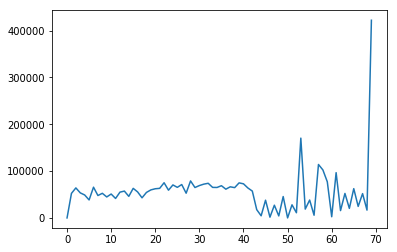

In [49]:
plt.plot(Arabica_Prod_Y_M_sum['Value'].values)
plt.show

In [38]:
levels = Arabica_Prod_Y_M_sum.index.levels


In [42]:
levels[1].astype(str)
levels[0].astype(str)

Index(['0', '6', '12'], dtype='object', name='Month')

In [45]:
Export_DF = Attribute_Ind_DF.loc['Bean Exports',:]
Export_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value
Attribute_Description,,,,,,,,,,,
Bean Exports,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,2,(1000 60 KG BAGS),0.0
Bean Exports,711100,"Coffee, Green",AG,Algeria,2004,2012,6,90,2,(1000 60 KG BAGS),0.0
Bean Exports,711100,"Coffee, Green",AG,Algeria,2005,2012,6,90,2,(1000 60 KG BAGS),0.0
Bean Exports,711100,"Coffee, Green",AG,Algeria,2006,2012,6,90,2,(1000 60 KG BAGS),0.0
Bean Exports,711100,"Coffee, Green",AG,Algeria,2007,2012,6,90,2,(1000 60 KG BAGS),0.0


In [47]:
Export_Y_M_sum = Export_DF.groupby(['Calendar_Year', 'Month']).sum()

In [48]:
Export_Y_M_sum

,,Commodity_Code,Market_Year,Attribute_ID,Unit_ID,Value
Calendar_Year,Month,,,,,
1959,0,1422200,3920,180,4,0.0
1960,0,39821600,109816,5040,112,42708.0
1961,0,39821600,109872,5040,112,45950.0
1962,0,39821600,109928,5040,112,46740.0
1963,0,39821600,109984,5040,112,50879.0
1964,0,39821600,110040,5040,112,41788.0
1965,0,39821600,110096,5040,112,49708.0
1966,0,39821600,110152,5040,112,48406.0
1967,0,39821600,110208,5040,112,54893.0


<function matplotlib.pyplot.show>

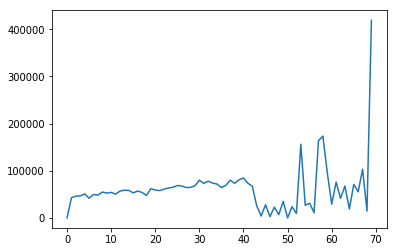

In [50]:
plt.plot(Export_Y_M_sum['Value'].values)
plt.show

In [52]:
Import_DF = Attribute_Ind_DF.loc['Bean Imports',:]
Import_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value
Attribute_Description,,,,,,,,,,,
Bean Imports,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,2,(1000 60 KG BAGS),1800.0
Bean Imports,711100,"Coffee, Green",AG,Algeria,2004,2012,6,58,2,(1000 60 KG BAGS),1960.0
Bean Imports,711100,"Coffee, Green",AG,Algeria,2005,2012,6,58,2,(1000 60 KG BAGS),1920.0
Bean Imports,711100,"Coffee, Green",AG,Algeria,2006,2012,6,58,2,(1000 60 KG BAGS),2075.0
Bean Imports,711100,"Coffee, Green",AG,Algeria,2007,2012,6,58,2,(1000 60 KG BAGS),1825.0


In [55]:
Import_Y_M_sum = Import_DF.groupby(['Calendar_Year', 'Month']).sum()

In [56]:
Import_Y_M_sum

,,Commodity_Code,Market_Year,Attribute_ID,Unit_ID,Value
Calendar_Year,Month,,,,,
1959,0,1422200,3920,116,4,0.0
1960,0,39821600,109816,3248,112,211.0
1961,0,39821600,109872,3248,112,184.0
1962,0,39821600,109928,3248,112,167.0
1963,0,39821600,109984,3248,112,142.0
1964,0,39821600,110040,3248,112,92.0
1965,0,39821600,110096,3248,112,223.0
1966,0,39821600,110152,3248,112,265.0
1967,0,39821600,110208,3248,112,246.0


<function matplotlib.pyplot.show>

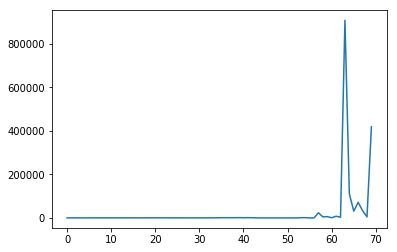

In [57]:
plt.plot(Import_Y_M_sum['Value'].values)
plt.show

<function matplotlib.pyplot.show>

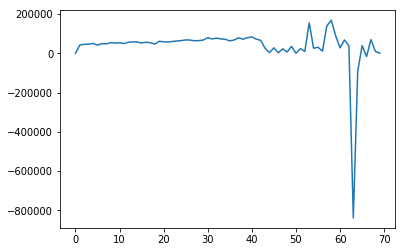

In [58]:
plt.plot(Export_Y_M_sum['Value'].values - Import_Y_M_sum['Value'].values)
plt.show